File              ML algorithm       accuracy        Precision       Recall          F1-score        Time           
all_data          ID3                0.95            0.93            0.89            0.91            10.7102        


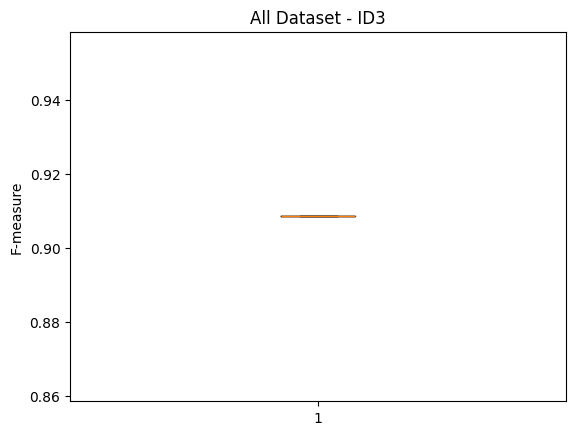

Mission accomplished!
Total operation time: =  121.86240196228027 seconds


In [2]:
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, recall_score, precision_score
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import csv
import time
import warnings
warnings.filterwarnings("ignore")


result = "./results/results_3.csv"  # CSV file for saving the results
csv_files = ["all_data.csv"]  # Dataset filenames
path = ""
repetition = 10


def folder(f_name):  # Creates folders for saving results and graphs
    try:
        if not os.path.exists(f_name):
            os.makedirs(f_name)
    except OSError:
        print("The folder could not be created!")


folder_name = "./results/"
folder(folder_name)
folder_name = "./results/result_graph_3/"
folder(folder_name)


# Retain only ID3 algorithm
ml_list = {
    "ID3": DecisionTreeClassifier(max_depth=5, criterion="entropy")
}

# List of features
features = {
    "all_data": ["Bwd Packet Length Std", "Flow Bytes/s", "Total Length of Fwd Packets", "Fwd Packet Length Std",
                 "Flow IAT Std", "Flow IAT Min", "Fwd IAT Total", "Label"]
}

seconds = time.time()  # Timestamp for processing time

with open(result, "w", newline="", encoding="utf-8") as f:  # Create CSV file to save the results
    wrt = csv.writer(f)
    wrt.writerow(["File", "ML algorithm", "accuracy", "Precision", "Recall", "F1-score", "Time"])

for j in csv_files:  # Loop through the dataset files
    print('%-17s %-17s  %-15s %-15s %-15s %-15s %-15s' % ("File", "ML algorithm", "accuracy", "Precision", "Recall", "F1-score", "Time"))  # Output header
    feature_list = list(features[j[0:-4]])
    df = pd.read_csv(path + j, usecols=feature_list)  # Read dataset
    df = df.fillna(0)
    
    # Change the label to "1" for normal and "0" for attacks
    attack_or_not = [1 if i == "BENIGN" else 0 for i in df["Label"]]
    df["Label"] = attack_or_not

    y = df["Label"]  # Separate labels (y) and data (X)
    del df["Label"]
    feature_list.remove('Label')
    X = df[feature_list]

    for ii in ml_list:  # Loop for the ID3 algorithm
        precision = []
        recall = []
        f1 = []
        accuracy = []
        t_time = []
        for i in range(repetition):  # Repeat cross-validation 10 times
            second = time.time()  # Timestamp for processing time

            # Split data for training and testing
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=repetition)

            # Apply ID3 algorithm
            clf = ml_list[ii]
            clf.fit(X_train, y_train)
            predict = clf.predict(X_test)

            # Calculate metrics
            f_1 = f1_score(y_test, predict, average='macro')
            pr = precision_score(y_test, predict, average='macro')
            rc = recall_score(y_test, predict, average='macro')

            precision.append(float(pr))
            recall.append(float(rc))
            f1.append(float(f_1))
            accuracy.append(clf.score(X_test, y_test))
            t_time.append(float((time.time() - second)))

        print('%-17s %-17s  %-15s %-15s %-15s %-15s %-15s' % (j[0:-4], ii, str(round(np.mean(accuracy), 2)), str(round(np.mean(precision), 2)),
                                                               str(round(np.mean(recall), 2)), str(round(np.mean(f1), 2)), str(round(np.mean(t_time), 4))))

        with open(result, "a", newline="", encoding="utf-8") as f:  # Save the results to CSV file
            wrt = csv.writer(f)
            for i in range(len(t_time)):
                wrt.writerow([j[0:-4], ii, accuracy[i], precision[i], recall[i], f1[i], t_time[i]])

         # Create box plots for the ID3 results
        plt.boxplot(f1)
        plt.title("All Dataset - " + str(ii))
        plt.ylabel('F-measure')
        # Save the figure as a PDF without the 'papertype' and 'orientation' arguments
        plt.savefig(folder_name + j[0:-4] + str(ii) + ".pdf", bbox_inches='tight', format='pdf')
        plt.show()

print("Mission accomplished!")
print("Total operation time: = ", time.time() - seconds, "seconds")
